# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 6, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Loes Bijman 15211312

Sacha Gijsbers 12798525

## Importing packages
Execute the following statement to import the packages `numpy` and `math` and the plotting package Matplotlib.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

The `math` package contains functions such as $\tan$, $\exp$ and the factorial $n \mapsto n!$

In [2]:
# example: the factorial function
math.factorial(5)

120

If you want to access `math.factorial` without typing `math.` each time you use it, use `import from`. Same for `math.exp`

In [3]:
from math import factorial, exp, tan

factorial(5)

120

## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


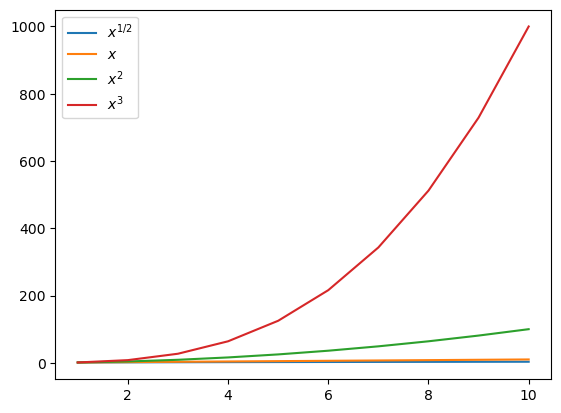

In [4]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

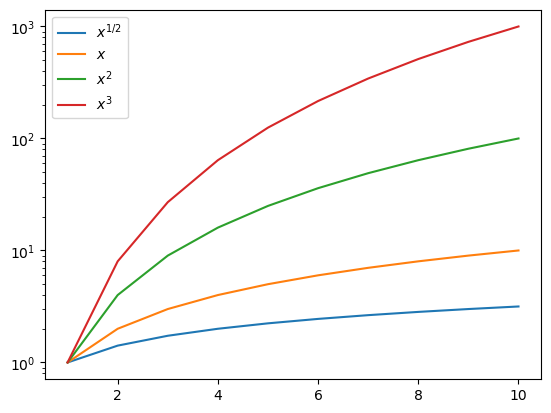

In [5]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


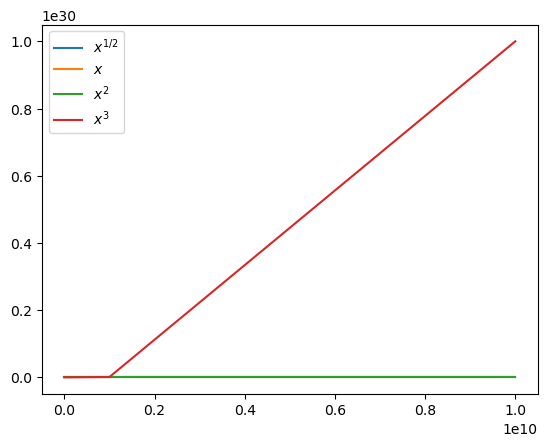

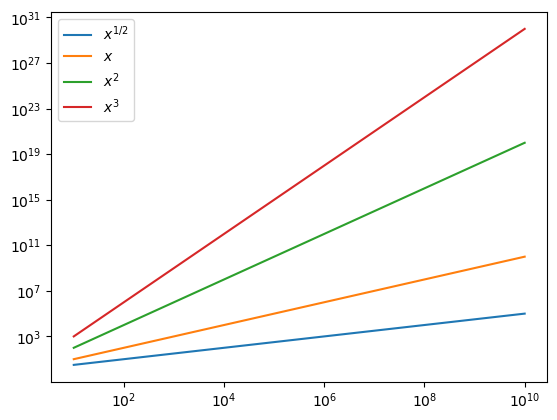

In [6]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^3$")
plt.legend()
plt.show()

## Python float types
Information about the Python `float` type is in `sys.float_info`.

In [7]:
import sys

# printing float_info displays information about the python float type
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [8]:
# the individual properties can be accessed as follows
print("epsilon for the python float type: ", sys.float_info.epsilon)

epsilon for the python float type:  2.220446049250313e-16


-----
# Exercise 1

## (a)
Write a program to compute an approximate value for the derivative of a function using the finite difference formula 
$$f'(x) \approx \frac{f(x+h) - f(x)}{h} .$$
Test your program using the function $\tan(x)$ for $x=1$. Determine the error by comparing with the analytical derivative of $\tan(x)$. Plot the magnitude of the error as a function of $h$, for $h = 10^{-k}$, $k=0,1,2, \ldots, 16$ using an appropriate type of plot. Is there a minimum value for the magnitude of the error? How does the corresponding value for $h$ compare with the rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ derived in Heath example 1.3?

In [9]:
from math import tan, cos

x = 1
h = 0.001

def approx_derivative_tan(x, h):
    return (tan(x + h) - tan(x))/h

approx = approx_derivative_tan(x, h)
print(f"Approximate value for the derivative of tan(x) = {approx}")

def derivative_tan(x):
    return 1/(cos(x)**2)

analytic = derivative_tan(1)
print(f"Analytical value for the derivative of tan(x) = {analytic}")

def abs_error(approx, derivative_tan, x):
    analytical = derivative_tan(x)
    return abs(analytical - approx)

approx = approx_derivative_tan(x, h)
error = abs_error(approx, derivative_tan, x)

print(f"Absolute error for the derivative of tan(x) = {error}")


Approximate value for the derivative of tan(x) = 3.430863217312563
Analytical value for the derivative of tan(x) = 3.425518820814759
Absolute error for the derivative of tan(x) = 0.005344396497803938


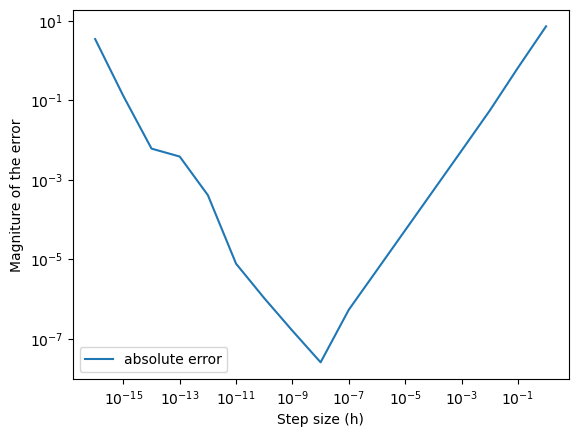

The minimum value for the magnitude of the error is 2.554135347665465e-08 for h = 1e-08


In [10]:
x = 1

h = []
for k in range(17):
    h.append(10**(-k))

y = []
for value in h:
    y.append(abs_error(approx_derivative_tan(x, value), derivative_tan, x))

plt.loglog(h, y, label=r"absolute error")
plt.legend()
plt.ylabel("Magniture of the error")
plt.xlabel("Step size (h)")
plt.show()

# minimum value for the magnitude of the error
min_y = min(y)
min_index = y.index(min_y)
min_h = h[min_index]

print(f"The minimum value for the magnitude of the error is {min_y} for h = {min_h}")


The minimum value for the magnitude of the error we found is $2.554135347665465\cdot 10^{-8}$ for $h = 1\cdot 10^{-8}$. Since we use a set step size, it is not proven that this is the actual value of $h$ for which the error is minimal. We therefore approximate the value of $h$ with minimal error and state that $h_{\rm min}\approx 1\cdot10^{-8}$. Python uses double precision, which means that $\epsilon_{\rm mach} = 1 \cdot 10^{-16}$. We can see that $h_{\rm min}^2 \approx (1\cdot 10^{-8})^2 = 1\cdot 10^{-16} = \epsilon_{\rm mach}$. This corresponds to the rule of thumb as found in the Heath example 1.3.

## (b)
Repeat the exercise using the centered difference approximation
$$ f'(x) \approx \frac{f(x+h) - f(x-h)}{2h} .$$

Approximate centered difference value for the derivative of tan(x) = 3.430863217312563
Analytical value for the derivative of tan(x) = 3.425518820814759
Absolute error for the derivative of tan(x) = 9.450528810628356e-06


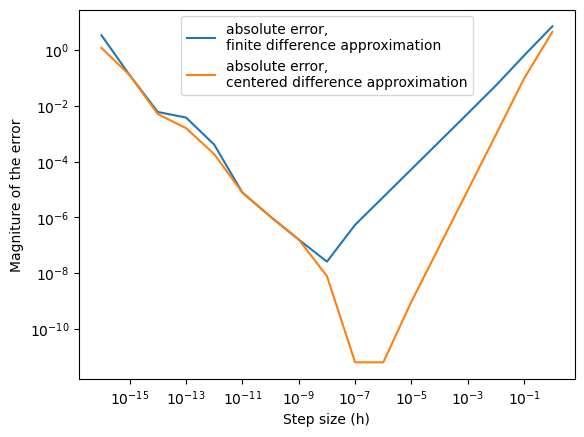

The minimum value for the magnitude of the error is 6.2239102760486276e-12 for h = 1e-06


In [11]:
from math import tan, cos

x = 1
h_value = 0.001

def approx_difference_derivative_tan(x, h):
    return (tan(x + h) - tan(x-h))/(2*h)

approx_difference = approx_derivative_tan(x, h_value)
print(f"Approximate centered difference value for the derivative of tan(x) = {approx_difference}")

analytic = derivative_tan(1)
print(f"Analytical value for the derivative of tan(x) = {analytic}")

error = abs_error(approx_difference_derivative_tan(x, h_value), derivative_tan, x)
print(f"Absolute error for the derivative of tan(x) = {error}")

y2 = []
for value in h:
    y2.append(abs_error(approx_difference_derivative_tan(x, value), derivative_tan, x))

plt.loglog(h, y, label=f"absolute error,\nfinite difference approximation")
plt.loglog(h, y2, label=f"absolute error,\ncentered difference approximation")
plt.legend()
plt.ylabel("Magniture of the error")
plt.xlabel("Step size (h)")
plt.show()

# minimum value for the magnitude of the error
min_y2 = min(y2)
min_index = y2.index(min_y2)
min_h2 = h[min_index]

print(f"The minimum value for the magnitude of the error is {min_y2} for h = {min_h2}")


The minimum value for the magnitude of the error is $6.2239102760486276\cdot 10^{-12}$ for $h = 1\cdot 10^{-7}$. The minimal magnitude of the error is greatly reduced (from $2.554135347665465\cdot10^{-8}$ with the finite difference approximation to $6.2239102760486276\cdot 10^{-12}$ with the centered difference approximation). The rule of thumb $h \approx \sqrt{\epsilon_{\rm mach}}$ does not apply for this approximation. We can see that the truncation error is reduced by the more accurate finite difference formula, meaning that the rounding error has an impact for larger values of $h$.

-----
# Exercise 2
As you probably know, the exponential function $e^x$ is given by an infinite series
$$ \tag{*} e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots . $$

## (a)
Suppose you write a program to sum the series in the natural order, what stopping criterion should you use? Explain your answer.

Since $e^x$ is approximated with an infinite series, the truncation error becomes less and less the more terms you add to the sum. If you write a program to sum the series, eventually the rounding error will make the approximation less accurate. When that is the case, you want to stop your program from adding terms to the approximation, as it is no longer improving your solution. 

## (b)
Write a program to sum the series in the natural order, using the stopping criterion you just described.

Test your program for $$x = \pm 1, \pm 5, \pm 10, \pm 15, \pm 20 , $$ and compare your results with the built-in function $\exp(x)$. Explain any cases where the exponential function is not well approximated.

In [12]:
from math import exp
print(exp(223))

7.041569407813597e+96


In [18]:
from math import exp, factorial

def approximate_e(x, abs_error):
    """
    Aprroximates e^x with the infinite sum x
    """
    approx_e = 0
    n = 0
    abs_err = exp(x)
    prev_abs = abs_err*2
    while abs_err < prev_abs:
        approx_e += (x**n)/factorial(n)
        prev_abs = abs_err
        abs_err = abs_error(approx_e, exp, x)
        n += 1
    return approx_e, n, prev_abs

x_list = [1, -1, 5, -5, 10, -10, 15, -15, 20, -20]
for x in x_list:
    approx_e, n, prev_abs = approximate_e(x, abs_error)
    if n == 1:
        print(f"For x = {x}, we obtain e^{x} = {approx_e} for {n} terms, with error = {prev_abs}. The function might not work.")
    else:
        print(f"For x = {x}, we obtain e^{x} = {approx_e} for {n} terms, with error = {prev_abs}")

For x = 1, we obtain e^1 = 2.7182818284590455 for 19 terms, with error = 4.440892098500626e-16
For x = -1, we obtain e^-1 = 1.0 for 1 terms, with error = 0.36787944117144233. The function might not work.
For x = 5, we obtain e^5 = 148.41315910257657 for 34 terms, with error = 2.842170943040401e-14
For x = -5, we obtain e^-5 = 1.0 for 1 terms, with error = 0.006737946999085467. The function might not work.
For x = 10, we obtain e^10 = 22026.46579480671 for 47 terms, with error = 7.275957614183426e-12
For x = -10, we obtain e^-10 = 1.0 for 1 terms, with error = 4.5399929762484854e-05. The function might not work.
For x = 15, we obtain e^15 = 3269017.3724721107 for 59 terms, with error = 0.0
For x = -15, we obtain e^-15 = 1.0 for 1 terms, with error = 3.059023205018258e-07. The function might not work.
For x = 20, we obtain e^20 = 485165195.40979016 for 69 terms, with error = 1.1920928955078125e-07
For x = -20, we obtain e^-20 = 1.0 for 1 terms, with error = 2.061153622438558e-09. The fun

## (c)

Can you use the series in this form to obtain accurate results for $x<0$? (*Hint*: $e^{-x} = 1/e^x$.) If yes, write a second program that implements this and test it again on $x=-1, -5, -10, -15, -20$. 

Write your answer, using $\LaTeX$, in this box.

In [17]:
def approximate_e(x, abs_error):
    """
    Aprroximates e^x with the infinite sum x
    """
    approx_e = 0
    n = 0
    abs_err = exp(abs(x))
    prev_abs = abs_err*2
    while abs_err < prev_abs:
        approx_e += (abs(x)**n)/factorial(n)
        prev_abs = abs_err
        if x<0:
            abs_err = abs_error(1/approx_e, exp, x)
        else:
            abs_err = abs_error(approx_e, exp, x)
        n += 1
    return approx_e, n, prev_abs

x_list = [1, -1, 5, -5, 10, -10, 15, -15, 20, -20]
for x in x_list:
    approx_e, n, prev_abs = approximate_e(x, abs_error)
    if n == 1:
        print(f"For x = {x}, the function does not work")
    else:
        print(f"For x = {x}, we obtain e^{x} = {approx_e} for {n} terms, with error = {prev_abs}")

For x = 1, we obtain e^1 = 2.7182818284590455 for 19 terms, with error = 4.440892098500626e-16
For x = -1, we obtain e^-1 = 2.7182818284590455 for 19 terms, with error = 5.551115123125783e-17
For x = 5, we obtain e^5 = 148.41315910257657 for 34 terms, with error = 2.842170943040401e-14
For x = -5, we obtain e^-5 = 148.41315910257657 for 34 terms, with error = 1.734723475976807e-18
For x = 10, we obtain e^10 = 22026.46579480671 for 47 terms, with error = 7.275957614183426e-12
For x = -10, we obtain e^-10 = 22026.46579480671 for 47 terms, with error = 6.776263578034403e-21
For x = 15, we obtain e^15 = 3269017.3724721107 for 59 terms, with error = 0.0
For x = -15, we obtain e^-15 = 3269017.3724721107 for 59 terms, with error = 0.0
For x = 20, we obtain e^20 = 485165195.40979016 for 69 terms, with error = 1.1920928955078125e-07
For x = -20, we obtain e^-20 = 485165195.40979016 for 69 terms, with error = 4.1359030627651384e-25


## (d)

Can you rearrange the series of regroup the terms of the series (\*) in any way to obtain more acccurate results for $x < 0$?

Write your answer, using $\LaTeX$, in this box.